In [70]:
!pip install geopandas
!pip install contextily
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 67.7 MB/s eta 0:00:00


In [37]:
def read_file(filepath):
  try:
    with open(filepath, 'r') as f:
      content = f.read()
    return content
  except FileNotFoundError:
    print(f"Error: File '{filepath}' not found.")
    return None

# Example usage: Assuming 'rotation.rot' is in the current directory
rot = read_file('rotation.rot')
rot

'83330  0.0   90.0    0.0    0.0  8333 !  S. Norfolk Ridge outer boundary - S. Norfolk Ridge \n83330 85.96   90.0    0.0    0.0  8333 !  S. Norfolk Ridge outer boundary - S. Norfolk Ridge \n83330 100.0  -58.51  -33.61    0.45  8333 !Calculated interactively by GPlates \n83330 600.0   90.0    0.0    0.0  8333 !  S. Norfolk Ridge outer boundary - S. Norfolk Ridge \n83340  0.0   90.0    0.0    0.0  8334 !  N. Norfolk Ridge outer boundary - N. Norfolk Ridge \n83340 85.96   90.0    0.0    0.0  8334 !  N. Norfolk Ridge outer boundary - N. Norfolk Ridge \n83340 100.0    4.41  -31.26    1.52  8334 !Calculated interactively by GPlates \n83340 600.0   90.0    0.0    0.0  8334 !  N. Norfolk Ridge outer boundary - N. Norfolk Ridge \n83350  0.0   90.0    0.0    0.0  8335 !  Reinga Ridge outer boundary - Reinga Ridge \n83350 85.96   90.0    0.0    0.0  8335 !  Reinga Ridge outer boundary - Reinga Ridge \n83350 100.0   23.07  -11.72    2.46  8335 !Calculated interactively by GPlates \n83350 600.0   9

In [38]:
rot = rot.strip().split('\n')
rot[:7]

['83330  0.0   90.0    0.0    0.0  8333 !  S. Norfolk Ridge outer boundary - S. Norfolk Ridge ',
 '83330 85.96   90.0    0.0    0.0  8333 !  S. Norfolk Ridge outer boundary - S. Norfolk Ridge ',
 '83330 100.0  -58.51  -33.61    0.45  8333 !Calculated interactively by GPlates ',
 '83330 600.0   90.0    0.0    0.0  8333 !  S. Norfolk Ridge outer boundary - S. Norfolk Ridge ',
 '83340  0.0   90.0    0.0    0.0  8334 !  N. Norfolk Ridge outer boundary - N. Norfolk Ridge ',
 '83340 85.96   90.0    0.0    0.0  8334 !  N. Norfolk Ridge outer boundary - N. Norfolk Ridge ',
 '83340 100.0    4.41  -31.26    1.52  8334 !Calculated interactively by GPlates ']

In [39]:
rot[1000:1010]

['201065 20.0  -12.62   28.92    0.55  201 ! Andes Fix sw 2013-05-29 ',
 '201065 25.0  -12.62   28.92    0.55  201 ! Andes Fix sw 2013-05-29 ',
 '201065 30.0  -12.62   28.92    0.54  201 ! Andes Fix sw 2013-05-29 ',
 '201065 35.0  -12.62   28.92    0.54  201 ! Andes Fix sw 2013-05-29 ',
 '201065 40.0  -12.62   28.92    0.53  201 ! Andes Fix sw 2013-05-29 ',
 '201065 45.0  -12.62   28.92    0.53  201 ! Andes Fix sw 2013-05-29 ',
 '201065 600.0  -12.62   28.92    0.53  201 ! Andes Fix sw 2013-05-29 ',
 '201066  0.0   90.0    0.0    0.0  201 ! Andes Fix sw 2013-05-29 ',
 '201066  5.0  -45.99   53.74    0.17  201 ! Andes Fix sw 2013-05-29 ',
 '201066 10.0  -40.95   48.73    0.32  201 ! Andes Fix sw 2013-05-29 ']

In [3]:
import gzip
import shutil

def unzip_gzip_file(input_file, output_file):
    """Unzips a gzip file.

    Args:
        input_file: Path to the gzip file.
        output_file: Path to the output file (unzipped).
    """
    try:
        with gzip.open(input_file, 'rb') as f_in:
            with open(output_file, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        print(f"Successfully unzipped '{input_file}' to '{output_file}'")
    except FileNotFoundError:
        print(f"Error: File '{input_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Example usage
unzip_gzip_file('coastlines.gpmlz', 'coastlines.gpml')

Successfully unzipped 'coastlines.gpmlz' to 'coastlines.gpml'


In [7]:
import gzip
import shutil
import xml.etree.ElementTree as ET

def read_xml_file(filepath):
    """Reads an XML file and returns its root element.

    Args:
        filepath: Path to the XML file.

    Returns:
        The root element of the XML file, or None if an error occurs.
    """
    try:
        tree = ET.parse(filepath)
        root = tree.getroot()
        return root
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
        return None
    except ET.ParseError:
        print(f"Error: Invalid XML file '{filepath}'.")
        return None

# Example usage
root = read_xml_file('coastlines.gpml')

if root is not None:
    print("Root element:", root.tag)
    # Now you can process the XML data using the root element
    # For example:
    for child in root[:10]:
        print(child)

Root element: {http://www.gplates.org/gplates}FeatureCollection
<Element '{http://www.opengis.net/gml}featureMember' at 0x7db3755b73d0>
<Element '{http://www.opengis.net/gml}featureMember' at 0x7db3606a18f0>
<Element '{http://www.opengis.net/gml}featureMember' at 0x7db3606a5350>
<Element '{http://www.opengis.net/gml}featureMember' at 0x7db3606944f0>
<Element '{http://www.opengis.net/gml}featureMember' at 0x7db360698950>
<Element '{http://www.opengis.net/gml}featureMember' at 0x7db360682750>
<Element '{http://www.opengis.net/gml}featureMember' at 0x7db36068a7f0>
<Element '{http://www.opengis.net/gml}featureMember' at 0x7db3606749f0>
<Element '{http://www.opengis.net/gml}featureMember' at 0x7db360647ab0>
<Element '{http://www.opengis.net/gml}featureMember' at 0x7db360669300>


In [13]:
gpml = read_file('coastlines.gpml')

In [48]:
def print_gpml_info(root):
    namespaces = {
        'gpml': 'http://www.gplates.org/gplates',
        'gml': 'http://www.opengis.net/gml'
    }

    features = root.findall('gml:featureMember', namespaces)

    # Count different feature types
    feature_types = {}
    features_with_geometry = 0
    features_with_plateid = 0

    for feature in features:
        # Get feature type (the first child tag)
        feature_type = list(feature)[0].tag.split('}')[-1]
        feature_types[feature_type] = feature_types.get(feature_type, 0) + 1

        # Check for geometry
        if feature.find('.//gpml:points', namespaces) is not None:
            features_with_geometry += 1

        # Check for plate ID
        plate_id = feature.find('.//gpml:reconstructionPlateId', namespaces)
        if plate_id is not None and plate_id.text:
            features_with_plateid += 1

    print(f"Total features: {len(features)}")
    print("\nFeature types:")
    for ftype, count in feature_types.items():
        print(f"{ftype}: {count}")
    print(f"\nFeatures with geometry: {features_with_geometry}")
    print(f"Features with plate ID: {features_with_plateid}")

    # Print first feature that has both geometry and plate ID
    for feature in features:
        geom = feature.find('.//gpml:points', namespaces)
        plate_id = feature.find('.//gpml:reconstructionPlateId', namespaces)
        if geom is not None and plate_id is not None and plate_id.text:
            print("\nExample feature with geometry and plate ID:")
            print(f"Type: {list(feature)[0].tag.split('}')[-1]}")
            print(f"Plate ID: {plate_id.text}")
            print(f"First few coordinates: {geom.text[:100]}...")
            break

root = read_xml_file('coastlines.gpml')
if root is not None:
    print_gpml_info(root)

Total features: 2077

Feature types:
Basin: 187
ClosedContinentalBoundary: 1781
IslandArc: 109

Features with geometry: 0
Features with plate ID: 2077


In [50]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np

def parse_gpml_file(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Define namespace dictionary for easier parsing
    namespaces = {
        'gml': 'http://www.opengis.net/gml',
        'gpml': 'http://www.gplates.org/gplates'
    }

    # Extract basic information
    features = []

    for feature in root.findall('.//gpml:Basin', namespaces):
        feature_data = {}

        # Get basic attributes
        feature_data['name'] = feature.find('gml:name', namespaces).text
        feature_data['id'] = feature.find('gpml:identity', namespaces).text

        # Get time period
        valid_time = feature.find('.//gml:TimePeriod', namespaces)
        if valid_time is not None:
            begin_time = valid_time.find('.//gml:begin//gml:timePosition', namespaces)
            end_time = valid_time.find('.//gml:end//gml:timePosition', namespaces)
            feature_data['begin_time'] = begin_time.text if begin_time is not None else None
            feature_data['end_time'] = end_time.text if end_time is not None else None

        # Get plate information
        reconstruction_plate = feature.find('.//gpml:reconstructionPlateId//gpml:value', namespaces)
        feature_data['plate_id'] = reconstruction_plate.text if reconstruction_plate is not None else None

        # Get coordinates from all polygon outlines
        polygons = feature.findall('.//gml:Polygon//gml:posList', namespaces)
        coordinates = []
        for polygon in polygons:
            if polygon.text:
                coords = polygon.text.strip().split()
                # Convert string coordinates to floats and pair them
                coord_pairs = [(float(coords[i]), float(coords[i+1]))
                             for i in range(0, len(coords), 2)]
                coordinates.append(coord_pairs)

        feature_data['coordinates'] = coordinates

        # Get attributes from KeyValueDictionary
        for elem in feature.findall('.//gpml:KeyValueDictionaryElement', namespaces):
            key = elem.find('gpml:key', namespaces).text
            value = elem.find('gpml:value', namespaces).text
            feature_data[key] = value

        features.append(feature_data)

    return features

def get_coordinates_df(features):
    """Convert coordinates to a DataFrame for easier analysis"""
    all_coords = []
    for feature in features:
        for polygon in feature['coordinates']:
            for lat, lon in polygon:
                all_coords.append({
                    'name': feature['name'],
                    'latitude': lat,
                    'longitude': lon
                })
    return pd.DataFrame(all_coords)

# Usage example:
features = parse_gpml_file('coastlines.gpml')
coords_df = get_coordinates_df(features)

In [56]:
coords_df['name'].unique()

array(['Pacific', 'Marie Byrd Land', 'Africa', 'Northwest Africa',
       'Caribbean Ocean Floor', 'Zamboanga Peninsula', 'Andaman Sea west',
       'North America', 'South America', 'South Bismark Basin',
       'Halmahera Basin', 'Corsica/Sardinia', 'Sandwich Plate',
       'Falkland Plateau, trapped Scotia Sea', 'Iberia', 'Eurasia',
       'Nazca', 'Palawan Block', 'Solomon Sea', 'Farallon', 'Cocos',
       'Greenland', 'De Long/Henrietta Block', 'Sea of Okhotsk',
       'Macquarie Ridge', 'Outer Bering Shelf',
       'Northwest South Fiji Basin', 'Seychelles', 'Madagascar', 'Arabia',
       'Somalia', 'Australia', 'Antarctica',
       'Santa Cruz Basin, Lord Howe Rise', 'Owen Basin',
       'Northwest Africa-Bahamas'], dtype=object)

In [63]:
polygons = []
for feature in features:
    for coord_set in feature['coordinates']:
        # Convert to format expected by Shapely
        polygon = Polygon(coord_set)
        polygons.append({
            'name': feature['name'],
            'geometry': polygon
        })

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(polygons)

In [71]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon

def create_plate_map(features):
    # Create figure with Robinson projection (good for global visualization)
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection=ccrs.Robinson())

    # Add global features
    ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
    ax.add_feature(cfeature.OCEAN, facecolor='white')
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines()

    # Plot each plate polygon
    for feature in features:
        for coord_set in feature['coordinates']:
            poly = Polygon(coord_set)
            ax.add_geometries([poly],
                            ccrs.PlateCarree(),
                            facecolor='none',
                            edgecolor='red',
                            linewidth=2)

    # Set title
    plt.title('Tectonic Plates Reconstruction')

    return fig, ax

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


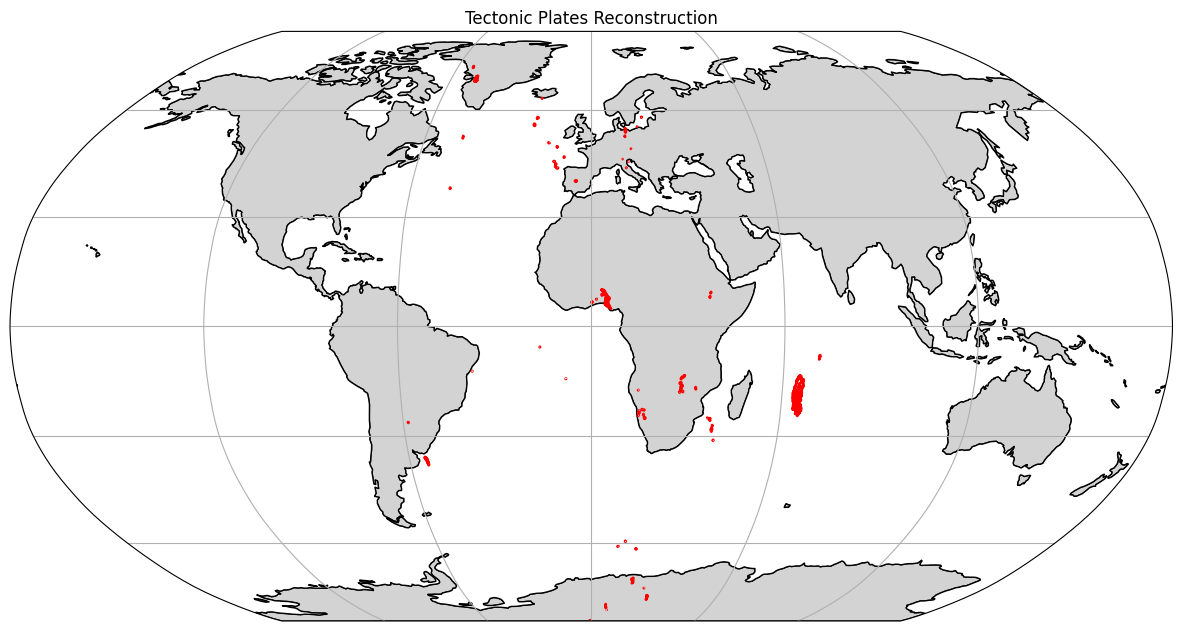

In [72]:
fig, ax = create_plate_map(features)
plt.show()

In [77]:
list(map(lambda a: a['name'], features))

['Pacific',
 'Pacific',
 'Pacific',
 'Pacific',
 'Pacific',
 'Pacific',
 'Pacific',
 'Pacific',
 'Marie Byrd Land',
 'Africa',
 'Northwest Africa',
 'Caribbean Ocean Floor',
 'Zamboanga Peninsula',
 'Andaman Sea west',
 'Andaman Sea west',
 'Andaman Sea west',
 'Andaman Sea west',
 'Andaman Sea west',
 'Andaman Sea west',
 'North America',
 'North America',
 'North America',
 'North America',
 'South America',
 'Zamboanga Peninsula',
 'South Bismark Basin',
 'South Bismark Basin',
 'South Bismark Basin',
 'South Bismark Basin',
 'Halmahera Basin',
 'Halmahera Basin',
 'Corsica/Sardinia',
 'Sandwich Plate',
 'Falkland Plateau, trapped Scotia Sea',
 'Falkland Plateau, trapped Scotia Sea',
 'Falkland Plateau, trapped Scotia Sea',
 'Falkland Plateau, trapped Scotia Sea',
 'Pacific',
 'North America',
 'Iberia',
 'Iberia',
 'Iberia',
 'Iberia',
 'Northwest Africa',
 'Northwest Africa',
 'Northwest Africa',
 'Northwest Africa',
 'Northwest Africa',
 'Northwest Africa',
 'Northwest Africa',
 

In [139]:
tree = ET.parse('coastlines.gpml')
root = tree.getroot()

In [140]:
namespaces = {
    'gml': 'http://www.opengis.net/gml',
    'gpml': 'http://www.gplates.org/gplates'
}

In [138]:
root

<Element '{http://www.gplates.org/gplates}FeatureCollection' at 0x7db34abac7c0>

In [136]:
features = root.findall('.//gml:featureMember', namespaces)

In [130]:
featureTypes = set()
for feature in features:
    # Get all immediate children of this feature
    children = list(feature)
    assert len(children) == 1

    tag_name = children[0].tag.split('}')[-1]  # This removes the namespace part
    featureTypes.add(tag_name)

print(featureTypes)

{'ClosedContinentalBoundary', 'IslandArc', 'Basin'}


In [143]:
continents = root.findall('.//gpml:ClosedContinentalBoundary', namespaces)
len(continents)

1781

In [150]:
list(continents[0])

[<Element '{http://www.gplates.org/gplates}identity' at 0x7db345d7dc10>,
 <Element '{http://www.gplates.org/gplates}revision' at 0x7db345d7dcb0>,
 <Element '{http://www.gplates.org/gplates}boundary' at 0x7db345d7dee0>,
 <Element '{http://www.gplates.org/gplates}shapefileAttributes' at 0x7db345d7dbc0>,
 <Element '{http://www.gplates.org/gplates}reconstructionPlateId' at 0x7db345d6fc90>,
 <Element '{http://www.opengis.net/gml}validTime' at 0x7db345d6fce0>,
 <Element '{http://www.opengis.net/gml}name' at 0x7db345d6f600>,
 <Element '{http://www.gplates.org/gplates}conjugatePlateId' at 0x7db345d6f560>,
 <Element '{http://www.gplates.org/gplates}spreadingAsymmetry' at 0x7db345d6f150>,
 <Element '{http://www.gplates.org/gplates}leftPlate' at 0x7db345d6f1f0>,
 <Element '{http://www.gplates.org/gplates}rightPlate' at 0x7db345d6f3d0>,
 <Element '{http://www.gplates.org/gplates}geometryImportTime' at 0x7db345d6f420>]

In [152]:
positions = root.findall('.//gml:posList', namespaces)
len(positions)

2503

In [182]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon

def create_plate_map(polygons):
    # Create figure with Robinson projection (good for global visualization)
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection=ccrs.Robinson())

    # Add global features
    ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='black')
    ax.add_feature(cfeature.OCEAN, facecolor='white')
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines()

    # Plot each plate polygon
    for poly in polygons:
        ax.add_geometries([poly],
                        ccrs.PlateCarree (),
                        facecolor='none',
                        edgecolor='red',
                        linewidth=2)


    # Set title
    plt.title('Tectonic Plates Reconstruction')

    return fig, ax

In [174]:
print(positions[0].text.split())
print(len(positions[0].text.split()))
coord_pairs = [(float(positions[0].text.split()[i]), float(positions[0].text.split()[i+1]))
                             for i in range(0, len(positions[0].text.split()), 2)]
print(coord_pairs)

['19.853555999999941', '-155.08441699999997', '19.729971999999975', '-155.087806', '19.738222000000007', '-155.00502799999998', '19.519139000000024', '-154.80574999999999', '19.346417000000088', '-154.97772200000003', '19.136611000000016', '-155.50566700000002', '18.913056000000097', '-155.67533299999997', '18.998167000000024', '-155.78688900000003', '19.085082999999997', '-155.91097199999996', '19.346499999999935', '-155.88933300000002', '19.729639000000049', '-156.06461099999996', '19.98366699999994', '-155.83116699999994', '20.197389000000015', '-155.90624999999997', '20.27277799999996', '-155.85338899999999', '19.975000000000023', '-155.210139', '19.853555999999941', '-155.08441699999997']
32
[(19.85355599999994, -155.08441699999997), (19.729971999999975, -155.087806), (19.738222000000007, -155.00502799999998), (19.519139000000024, -154.80575), (19.346417000000088, -154.97772200000003), (19.136611000000016, -155.50566700000002), (18.913056000000097, -155.67533299999997), (18.998167

In [175]:
polygons = []
for position in positions:
    position_list = position.text.split()
    coord_pairs = [(float(position_list[i]), float(position_list[i+1]))
                             for i in range(0, len(position_list), 2)]
    polygons.append(Polygon(coord_pairs))

(<Figure size 1500x1000 with 1 Axes>,
 <GeoAxes: title={'center': 'Tectonic Plates Reconstruction'}>)

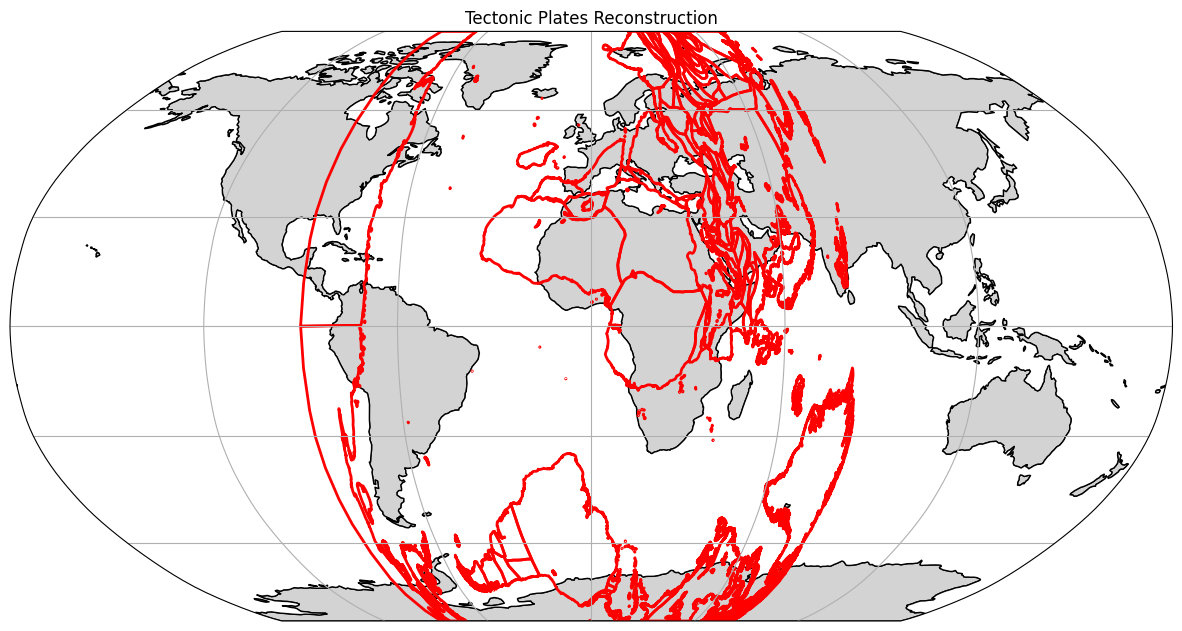

In [183]:
create_plate_map(polygons)